In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt

from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras import backend as K

%matplotlib inline

In [2]:
path="Data/UCI HAR Dataset/"
features = list()
with open(path+"Features.txt") as f:
    for line in f:
        features.append(line.split()[1])
print(len(features))

561


In [3]:
train_df = pd.read_csv(path+"train/X_train.txt", delim_whitespace = True)
train_df.columns = features

#train_df["subject_id"] = pd.read_csv(path+"train/subject_train.txt", header = None, squeeze = True) #squeeze = True will 
# #return data in pandas series format

train_df["activity"] = pd.read_csv(path+"train/y_train.txt", header = None, squeeze = True)

test_df = pd.read_csv(path+"test/X_test.txt", delim_whitespace = True)

#test_df["subject_id"] = pd.read_csv(path+"test/subject_test.txt", header = None, squeeze = True)
test_df["activity"] = pd.read_csv(path+"test/y_test.txt", header = None, squeeze = True)

train_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",activity
0,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,5
1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,5
2,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,5
3,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,5
4,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,-0.545410,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126,5


In [4]:
input = Input(shape=(562,))

encoded = Dense(128, activation='relu')(input)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(562, activation='sigmoid')(decoded)

deep_autoencoder = Model(input, decoded)

deep_autoencoder.summary()
deep_autoencoder.compile(optimizer='adadelta', loss='categorical_hinge', metrics=['accuracy'])

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 562)]             0         
_________________________________________________________________
dense (Dense)                (None, 128)               72064     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 562)              

In [5]:
history = deep_autoencoder.fit(
    train_df,
    train_df,
    epochs=25,
    batch_size=256,
    validation_data=(test_df, test_df)
)

Epoch 1/25
29/29 [==============================] - 1s 23ms/step - loss: 142.8982 - accuracy: 0.0000e+00 - val_loss: 143.1066 - val_accuracy: 0.0000e+00
Epoch 2/25
29/29 [==============================] - 0s 10ms/step - loss: 142.8061 - accuracy: 0.0000e+00 - val_loss: 143.0068 - val_accuracy: 0.0000e+00
Epoch 3/25
29/29 [==============================] - 0s 10ms/step - loss: 142.6956 - accuracy: 0.0000e+00 - val_loss: 142.8819 - val_accuracy: 0.0000e+00
Epoch 4/25
29/29 [==============================] - 0s 10ms/step - loss: 142.5484 - accuracy: 0.0000e+00 - val_loss: 142.7106 - val_accuracy: 0.0000e+00
Epoch 5/25
29/29 [==============================] - 0s 10ms/step - loss: 142.3501 - accuracy: 0.0000e+00 - val_loss: 142.4870 - val_accuracy: 0.0000e+00
Epoch 6/25
29/29 [==============================] - 0s 10ms/step - loss: 142.0934 - accuracy: 0.0000e+00 - val_loss: 142.1982 - val_accuracy: 0.0000e+00
Epoch 7/25
29/29 [==============================] - 0s 11ms/step - loss: 141.7561 

Text(0.5, 1.0, 'Test Loss')

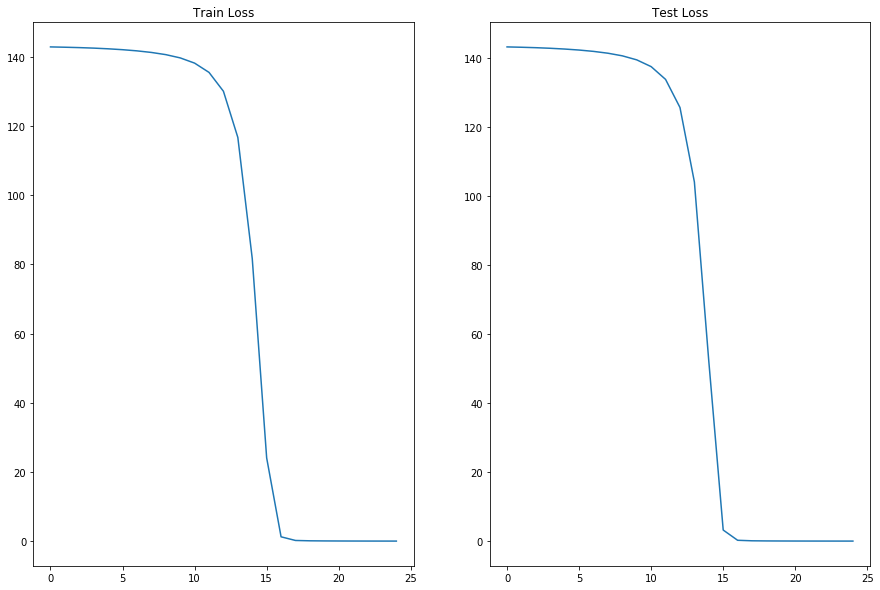

In [6]:
plt.figure(figsize=(15,10))
ax = plt.subplot(1, 2, 1)
plt.plot(history.history["loss"])
plt.title("Train Loss")
ax = plt.subplot(1, 2, 2)
plt.plot(history.history["val_loss"])
plt.title("Test Loss")

Text(0.5, 1.0, 'Accuracy')

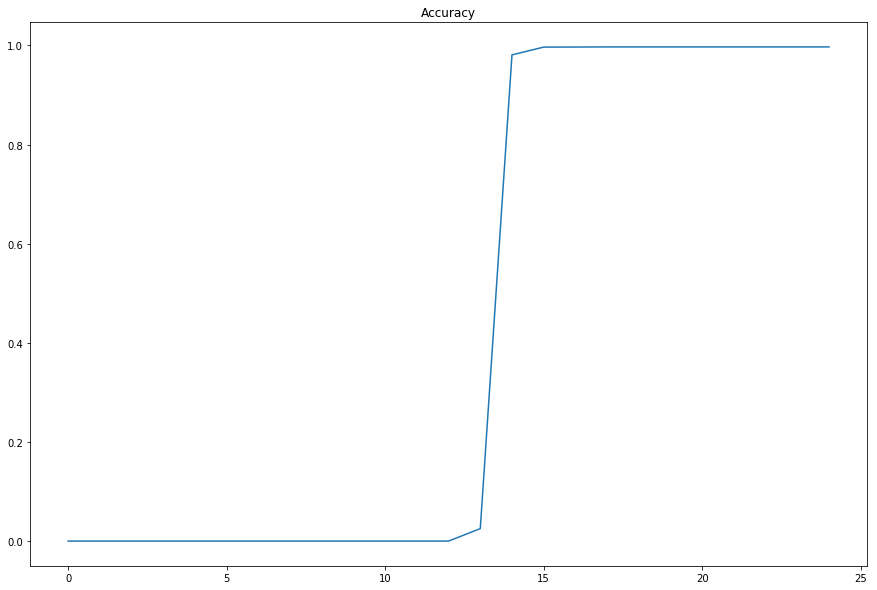

In [7]:
plt.figure(figsize=(15,10))
plt.plot(history.history["accuracy"])
plt.title("Accuracy")